In [1]:
# Description: this program attempts to optimize a users portfolio 
# using thr Efficient Frontier
# https://www.youtube.com/watch?v=9fjs8FeLMJk
# Uses package pypfopt

In [2]:
# import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# for other styles see 
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

In [3]:
#Get the stock symbols
#FAANG
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [4]:
# Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
# Get the portfolio strting date
stockStartDate = '2013-01-01'

In [6]:
# Get the ending date for the portdfolio (today)
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2020-05-16


In [7]:
# Create a data frame to store the adjusted close price
# of the stocks in the porfolio
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [8]:
# Show df
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823


/home/kathuman/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


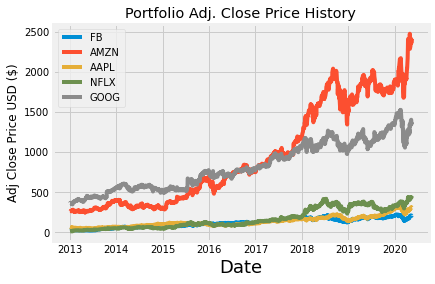

In [9]:
# Visually show the stock/porfolio
title = 'Portfolio Adj. Close Price History'
# get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Close Price USD ($)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [10]:
# Show the daily simple returns
returns = df.pct_change()
returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974


In [11]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252 #252 is the number of trading days in this year
print(cov_matrix_annual)

            FB      AMZN      AAPL      NFLX      GOOG
FB    0.115904  0.051822  0.040496  0.054077  0.048463
AMZN  0.051822  0.091997  0.035507  0.061166  0.046559
AAPL  0.040496  0.035507  0.076527  0.031745  0.037209
NFLX  0.054077  0.061166  0.031745  0.213856  0.048836
GOOG  0.048463  0.046559  0.037209  0.048836  0.064965


In [12]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print(port_variance)

0.05900037436228073


In [13]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
print(port_volatility)

0.2428999266411596


In [14]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
print(portfolioSimpleAnnualReturn)

0.34454987932059994


In [15]:
# Show the expected annual return, volatility (risk) and variance

percent_var = str(round(port_variance, 2)*100)+'%'
percent_vols = str(round(port_volatility, 2)*100)+'%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%0'

print('Expected annual return: ' + percent_ret)
print('Annual volatility: ' + percent_vols)
print('Annual Variance: ' + percent_var)

Expected annual return: 34.0%0
Annual volatility: 24.0%
Annual Variance: 6.0%


In [16]:
#pip install pyPortfolioOpt

In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
# Portfolio Optimization

# Clculate the expected returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'FB': 0.15253, 'AMZN': 0.29217, 'AAPL': 0.19664, 'NFLX': 0.35866, 'GOOG': 0.0}
Expected annual return: 41.0%
Annual volatility: 27.5%
Sharpe Ratio: 1.42


(0.41020523090682615, 0.27451856188957824, 1.421416563677692)

In [ ]:
# get the discrete allocations
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_proces, total_porfolio_value = 15000)

allcation, leftover = da.lp_portfolio()

print('Discrete allocation:', allocation)
print('funds')